# Machine Learning

# Autor: Daniel OviedoOther autors: Daniela Pinzon, Miguel

In [ ]:
import sys
# Version minima de sistema python 3.7
assert sys.version_info >= (3,7)

In [ ]:
from packaging import version
import sklearn
# Especificacion de version minima de la libreria a manipulacion
assert version.parse(sklearn.__version__) >= version.parse ('1.0.1')

# ___Punto 2 : Cargue y exploración del dataset___
---


## ___DataFrames___
---
>* Cree un script para cargar el archivo mnist_data.npz. El archivo contiene tres campos:
>* ___training data___, las características del conjunto de entrenamiento. Las filas son puntos de muestra
y las columnas son características
>* ___training labels___, Las filas son puntos de muestra. Hay una columna: las etiquetas correspondientes
a las filas de datos de entrenamiento anteriores.
>* ___test data___, the test set features. Las filas son puntos de muestra y las columnas son características

In [ ]:
!pip install requests rarfile numpy

In [ ]:
import os
import rarfile
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
def load_mnist_data(url, temp_dir='temp_data'):
    """
    Descarga un archivo RAR desde la URL dada, descomprime para extraer un archivo NPZ,
    y carga los datos del conjunto de MNIST en DataFrames de Pandas.

    Parámetros:
    - url: URL del archivo .rar que contiene el archivo .npz.
    - temp_dir: Directorio temporal para almacenar los archivos descargados y descomprimidos.

    Retorna:
    - Un diccionario con los DataFrames 'df_training_data', 'df_training_labels', y 'df_test_data',
      o None si el archivo no se puede cargar.
    """

    # Asegurarse de que el directorio temporal exista
    if not os.path.exists(temp_dir):
        os.makedirs(temp_dir)

    # Ruta del archivo RAR descargado
    rar_path = os.path.join(temp_dir, 'mnist-data.rar')

    # Descargar el archivo RAR
    print("Descargando el archivo...")
    response = requests.get(url)
    with open(rar_path, 'wb') as file:
        file.write(response.content)

    # Extraer y verificar el contenido del archivo RAR
    try:
        with rarfile.RarFile(rar_path) as rf:
            rf.extractall(path=temp_dir)
            print("Archivos contenidos en el RAR:", rf.namelist())
    except rarfile.Error as e:
        print("Error al descomprimir el archivo RAR:", e)
        return None

    # Suponiendo que el archivo se llama 'mnist_data.npz'
    npz_path = os.path.join(temp_dir, 'mnist-data.npz')

    # Cargar los datos si el archivo NPZ existe
    if os.path.exists(npz_path):
        with np.load(npz_path) as data:
            # Aplanar las imágenes y crear DataFrames
            df_training_data = pd.DataFrame(data['training_data'].reshape(data['training_data'].shape[0], -1))
            df_training_labels = pd.DataFrame(data['training_labels'], columns=['Label'])
            df_test_data = pd.DataFrame(data['test_data'].reshape(data['test_data'].shape[0], -1))

        print("Datos cargados exitosamente en DataFrames.")
        return {
            'df_training_data': df_training_data,
            'df_training_labels': df_training_labels,
            'df_test_data': df_test_data
        }
    else:
        print(f"El archivo {npz_path} no se encontró después de descomprimir.")
        return None

In [ ]:
url = 'https://github.com/daniela1612022/Parcial_Machine_Learning/raw/main/mnist-data.rar'
data = load_mnist_data(url)

if data:
    df_training_data = data['df_training_data']
    df_training_labels = data['df_training_labels']
    df_test_data = data['df_test_data']

    # Ahora puedes usar df_training_data y otros DataFrames
    print("Training Data Shape:", df_training_data.shape)
    print("Training Labels Shape:", df_training_labels.shape)
    print("Test Data Shape:", df_test_data.shape)
else:
    print("Los datos no se pudieron cargar o procesar correctamente.")

Descargando el archivo...
Archivos contenidos en el RAR: ['mnist-data.npz']
Datos cargados exitosamente en DataFrames.
Training Data Shape: (60000, 784)
Training Labels Shape: (60000, 1)
Test Data Shape: (10000, 784)


In [ ]:
df_training_data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, 0 to 783
dtypes: float32(784)
memory usage: 179.4 MB


In [ ]:
df_training_labels.head()

,Label
0,8
1,9
2,6
3,4
4,4


In [ ]:
df_training_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Label   60000 non-null  int64
dtypes: int64(1)
memory usage: 468.9 KB


In [ ]:
df_test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 784 entries, 0 to 783
dtypes: float32(784)
memory usage: 29.9 MB


### ___Justificación  función load_mnist_data___
---
>* La función load_mnist_data automatiza la descarga y extracción de estos datos desde un archivo comprimido y los convierte en DataFrames de Pandas. Estos DataFrames organizan los datos de entrenamiento, las etiquetas y los datos de prueba en formatos tabulares, facilitando su manipulación y análisis posterior.

>* Además de cargar y organizar los datos, realizamos una verificación exhaustiva para detectar valores nulos en cada DataFrame, confirmando que no existen valores nulos en ninguno de los conjuntos de datos (entrenamiento, etiquetas y prueba). Esta verificación asegura que los datos están completos y no requerirán tratamientos adicionales para manejar ausencias, lo cual es crucial para mantener la integridad del análisis y la eficacia del entrenamiento de modelos.

>* Mediante el uso de las funciones head() e info() de Pandas, proporcionamos una vista preliminar de los datos y un resumen informativo que incluye el tipo de datos y la cantidad de datos no nulos, lo que permite una primera evaluación rápida de la estructura y la limpieza de los datos. Estas herramientas son esenciales para la exploración inicial de los datos, permitiendo ajustes rápidos antes de proceder a análisis más profundos o entrenamiento de modelos.


## ___Características y Puntos de Muestra___
---
>* Explore los puntos de muestra y explique sus características. Revise si es necesario preprocesar. Debe
justificar la elección de los procesos realizados

### ___Exploración de los Datos___
---
> ___Objetivo:___  
* Entender la estructura, tipo y rango de los datos contenidos en los DataFrames training_data, training_labels, y test_data.
Características de los Puntos de Muestra:

>    ___Datos de Entrenamiento y Prueba (training_data, test_data):___
>*        Cada imagen de MNIST está representada como un array de 784 píxeles (después de aplanar la imagen original de 28x28 píxeles).
        Cada valor en el array representa la intensidad de un píxel en escala de grises, donde 0 es negro y 255 es blanco.

>    ___Etiquetas de Entrenamiento (training_labels):___
*        Cada etiqueta es un entero de 0 a 9, correspondiendo al dígito representado por la imagen asociada.

>___Revisión Inicial:___   
* Verificamos si hay valores null en los datasets

In [ ]:
dataframes = {
    'Training Data': df_training_data,
    'Training Labels': df_training_labels,
    'Test Data': df_test_data
}

In [ ]:
# Recorrer cada DataFrame y contar los valores nulos
for name, df in dataframes.items():
    null_count = df.isnull().sum().sum()  # Suma total de valores nulos en el DataFrame
    if null_count == 0:
        print(f"No hay valores nulos en {name}.")
    else:
        print(f"Hay {null_count} valores nulos en {name}.")

No hay valores nulos en Training Data.
No hay valores nulos en Training Labels.
No hay valores nulos en Test Data.


>* Se confirmó que no hay valores nulos,por ende no es necesario procesarlos para eliminar o imputar valores.

### ___Preprocesamiento de los Datos___
---
>* Dado que los valores de los píxeles están en el rango de 0 a 255, es común realizar algunos pasos de preprocesamiento antes de usar estos datos para entrenar un modelo SVM.

>___Aplanamiento:___
*  Ya hemos aplanado las imágenes de 28x28 a vectores de 784 elementos, lo cual es necesario para la mayoría de los modelos de machine learning, incluido SVM.

### ___Justificación del Preprocesamiento y Exploración___
---

>* La normalización de los valores de los píxeles mejora el rendimiento del modelo SVM. Los SVM son sensibles a la escala de los datos de entrada debido a cómo calculan las distancias entre los puntos de datos para determinar el margen óptimo. Al escalar los valores a un rango uniforme, aseguramos que el modelo no se sesgue hacia características con una mayor magnitud numérica.

>* El acondicionamiento de los datos (como asegurarse de que no hay valores nulos y que las características están en un formato adecuado para modelar) es crucial para evitar errores durante el entrenamiento y garantizar que el modelo aprenda de los patrones en los datos, y no de artefactos de cómo se codifican o estructuran los datos.

In [ ]:
unique_labels = np.unique(df_training_labels['Label'])

In [ ]:
# Seleccionar la primera imagen para cada etiqueta única
selected_images = []
selected_labels = []
for label in unique_labels:
    # Encuentra el índice de la primera ocurrencia de cada etiqueta
    index = df_training_labels[df_training_labels['Label'] == label].index[0]
    selected_images.append(df_training_data.iloc[index].values)
    selected_labels.append(label)

In [ ]:
def plot_images(images, labels, num_cols=5):
    """Función para mostrar una cuadrícula de imágenes MNIST con sus etiquetas."""
    num_rows = np.ceil(len(images) / num_cols).astype(int)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(1.5*num_cols, 2*num_rows))
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            # Las imágenes están aplanadas y necesitan ser redimensionadas a 28x28 para visualización
            img_shape = (28, 28)
            ax.imshow(images[i].reshape(img_shape), cmap='binary')
            ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

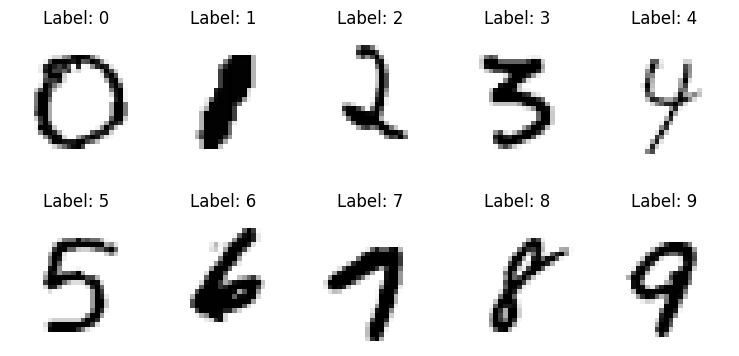

In [ ]:
# Llama a la función de trazado
plot_images(selected_images, selected_labels, num_cols=5)

### ___Justificación Visualización y Verificación de los Datos___
---
> ___Verificación de la Integralidad de los Datos___
 *   Justificación: Utilizar np.unique para identificar todas las etiquetas únicas en el conjunto de entrenamiento asegura que todas las clases estén presentes y correctamente representadas. Este paso es fundamental para prevenir sesgos en el modelo debido a una distribución desequilibrada de las clases, lo cual es crucial para mantener la integridad y la fiabilidad del proceso de entrenamiento del clasificador.

> ___Validación de Correspondencia de Datos y Etiquetas___
 *   Justificación: Al seleccionar una imagen de cada clase basada en las etiquetas y verificar su correspondencia, el código garantiza que las etiquetas sean precisas y estén bien asociadas con sus imágenes correspondientes. Este paso es vital para la verificación manual y asegura que no haya errores en la etiquetación, lo cual podría llevar a un entrenamiento incorrecto del modelo.

> ___Facilitación de la Inspección Visual___
*    Justificación: La función plot_images proporciona una herramienta visual para inspeccionar y verificar la calidad y características de las imágenes que se utilizarán para entrenar el modelo. La visualización de las imágenes con sus etiquetas correspondientes no solo ayuda en la verificación manual de los datos, sino que también facilita la comprensión y la demostración de la naturaleza de los datos a otros interesados o durante el análisis de datos.

# ___Punto 3 : Partición de los datos___
___

> No es usual que reciba los datos de "entrenamiento" y datos de "validación"; normalmente tendrá que dividir
usted mismo los datos etiquetados disponibles. Baraje (shunffle) y divida (partition) el conjunto de datos Tenga en cuenta que barajar antes de dividir es crucial para garantizar que todas las clases estén representadas
en sus particiones. Para esta pregunta, no utilice ninguna de las funciones disponibles en sklearn.

>* Escriba un código que reserve 10.000 imágenes de entrenamiento como conjunto de validación.

>* Mezcle las etiquetas con las imágenes de entrenamiento. Es un error muy común etiquetar
erróneamente las imágenes de entrenamiento olvidando permutar las etiquetas con las imágenes.

### ___Mezclar los Datos de Entrenamiento___
---
Barajar los datos antes de dividirlos es importante para garantizar que todos los lotes y subdivisiones de datos tengan una representación equitativa de todas las clases.

In [ ]:
# Convertimos DataFrames a numpy arrays para facilitar el manejo
training_data = df_training_data.to_numpy()
training_labels = df_training_labels.to_numpy()

In [ ]:
# Crear un array de índices y barajarlos
indices = np.arange(df_training_data.shape[0])
np.random.shuffle(indices)

In [ ]:
# Aplicar el orden barajado a los datos y etiquetas
shuffled_training_data = df_training_data.iloc[indices].reset_index(drop=True)
shuffled_training_labels = df_training_labels.iloc[indices].reset_index(drop=True)

### ___Dividir los Datos___
---
>* Una vez que los datos están correctamente barajados, puedes separar una parte de ellos para usar como conjunto de validación. En este caso, se reservarán 10,000 imágenes para validación.

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y validación
valid_data = shuffled_training_data[:10000]
valid_labels = shuffled_training_labels[:10000]

In [ ]:
# El resto será el conjunto de entrenamiento actualizado
train_data = shuffled_training_data[10000:]
train_labels = shuffled_training_labels[10000:]

### ___Justificación del Barajado (Shuffling) de los Datos___
---
>El barajado de los datos es esencial por varias razones:

 >*   ___Varianza de los Datos:___ Al barajar los datos, aseguramos que cada partición que creamos (en este caso, el conjunto de entrenamiento y de validación) sea una representación estadísticamente válida del conjunto de datos completo. Esto evita cualquier sesgo que pueda surgir debido al orden en que los datos fueron originalmente almacenados o recogidos.

 >*   ___Distribución Uniforme de Clases:___ Es crucial especialmente en conjuntos de datos clasificados como MNIST, donde las clases (dígitos del 0 al 9) deben estar igualmente representadas en cada subconjunto de datos para evitar sesgos en el entrenamiento del modelo. El barajado asegura que todas las clases estén mezcladas de manera aleatoria y distribuidas uniformemente entre los conjuntos de entrenamiento y validación.

 >*   ___Prevención del Sobreajuste:___ Barajar los datos antes de la partición también ayuda a prevenir el sobreajuste. Sin barajado, podrías terminar con particiones que no contienen variaciones representativas de los datos, haciendo que el modelo aprenda patrones específicos del conjunto de entrenamiento que no generalizan bien a datos nuevos.

### ___Justificación de la Partición de los Datos___
---
> La partición de los datos en conjuntos de entrenamiento y validación tiene su propia importancia:

>*    ___Evaluación Independiente:___ Al separar un conjunto de validación del conjunto de entrenamiento, podemos evaluar el rendimiento del modelo de manera independiente durante el proceso de entrenamiento. Esto proporciona una estimación honesta de cómo el modelo podría comportarse en el conjunto de prueba y, eventualmente, en datos reales no vistos.

>*    ___Afinamiento del Modelo:___ El conjunto de validación se puede utilizar para ajustar los parámetros del modelo, seleccionar características, y hacer decisiones de diseño sin comprometer la integridad del conjunto de prueba. Esto asegura que las mejoras en el modelo se deben a verdaderas mejoras en la capacidad predictiva y no a un ajuste a las peculiaridades específicas del conjunto de prueba.

>*    ___Control del Sobreajuste:___ La partición permite monitorear si el modelo está empezando a sobreajustarse al conjunto de entrenamiento. Observando el rendimiento tanto en el conjunto de entrenamiento como en el de validación, podemos tomar medidas si vemos que el rendimiento en el conjunto de validación comienza a decaer mientras que el rendimiento en el conjunto de entrenamiento sigue mejorando.

In [ ]:
sample_images = train_data.head(10).to_numpy()
sample_labels = train_labels.head(10).to_numpy()

In [ ]:
def plot_sample_images(images, labels, num_rows=1, num_cols=10):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(1.5 * num_cols, 2 * num_rows))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(28, 28), cmap='binary')
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

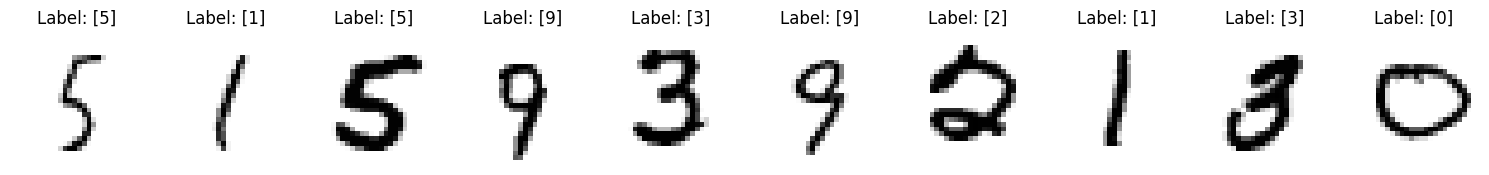

In [ ]:
# Llamar a la función para visualizar las imágenes
plot_sample_images(sample_images, sample_labels)

### ___Justificación Selección de Muestras para Verificación Rápida___
---
> ___Selección de Muestras para Confirmación Post-Barajado:___
 *   Propósito: Extraer las primeras 10 imágenes y sus etiquetas correspondientes después de barajar asegura una verificación rápida para confirmar que el proceso de barajado se ha realizado correctamente. Al convertir estas muestras en arrays de NumPy, se facilita su manipulación para procesos de visualización.

> ___Visualización para Verificación de Correspondencia:___
*    Propósito: La función plot_sample_images está diseñada para mostrar claramente las imágenes junto con sus etiquetas, lo que es esencial para verificar que cada imagen todavía corresponde a su etiqueta correcta después del barajado. Esto es crucial para asegurar que el proceso de barajado no haya desalineado las imágenes de sus etiquetas, lo cual podría afectar negativamente el rendimiento del modelo de aprendizaje automático.

# ___Punto 4 : Implementación del Algoritmo de entrenamiento___
---
> Utilizará máquinas de vectores de apoyo lineales para clasificar el conjunto de datos. En el caso de las
imágenes, utilizará las características más sencillas para la clasificación: los valores brutos de brillo de los
píxeles. En otras palabras, el vector de características para una imagen será un vector de filas con todos los
valores de píxeles concatenados en un orden de fila mayor (o columna mayor).

> Utilice la precisión de la clasificación, o el porcentaje de ejemplos clasificados correctamente, como medida del
rendimiento del clasificador

>Entrene una máquina lineal de vectores de soporte (SVM). Trace la precisión en los conjuntos de entrenamiento
y validación frente al número de ejemplos de entrenamiento que utilizó para entrenar su clasificador. El n úmero
de ejemplos de entrenamiento a utilizar se enumeran para cada conjunto de datos en las siguientes partes.

>Puede utilizar sklearn sólo para el modelo SVM y la función sklearn.metrics.accuracy_score. Todo lo demás
(generar gráficos) debe hacerse sin utilizar sklearn


## ___Entrenamiento del Modelo SVM___
---
>* Utilice píxeles en bruto como características. Entrene su modelo con los siguientes números de
ejemplos de entrenamiento: 100, 200, 500, 1,000, 2,000, 5,000, 10,000. Para el conjunto de
entrenamiento más grande, se esperan precisiones de validación de entre el 70% y el 90%.

In [ ]:
def train_svm_classifier(train_data, train_labels, valid_data, valid_labels, training_sizes):
    train_accuracies = []
    valid_accuracies = []

    # Convertir DataFrames a arrays de NumPy si aún no están convertidos
    train_data_np = train_data.to_numpy()
    train_labels_np = train_labels.values.ravel()
    valid_data_np = valid_data.to_numpy()
    valid_labels_np = valid_labels.values.ravel()

    for size in training_sizes:
        svm_classifier = SVC(kernel='linear')
        svm_classifier.fit(train_data_np[:size], train_labels_np[:size])

        # Precisión en el conjunto de entrenamiento
        train_accuracy = accuracy_score(train_labels_np[:size], svm_classifier.predict(train_data_np[:size]))
        train_accuracies.append(train_accuracy)

        # Precisión en el conjunto de validación
        valid_accuracy = accuracy_score(valid_labels_np, svm_classifier.predict(valid_data_np))
        valid_accuracies.append(valid_accuracy)

    return training_sizes, train_accuracies, valid_accuracies

## ___Gráfico precisión___
---
>* Incluya un gráfico que muestre la cantidad de ejemplos frente a la precisión de entrenamiento y
validación para el conjunto de datos.

In [ ]:
def plot_accuracies(training_sizes, train_accuracies, valid_accuracies):
    plt.figure(figsize=(18, 4))
    plt.plot(training_sizes, train_accuracies, label='Precisión de Entrenamiento', marker='o')
    plt.plot(training_sizes, valid_accuracies, label='Precisión de Validación', marker='x')
    plt.title('Precisión del SVM Lineal en función del Tamaño de Muestra de Entrenamiento')
    plt.xlabel('Número de Ejemplos de Entrenamiento')
    plt.ylabel('Precisión')
    plt.legend()
    plt.grid(True)
    plt.xticks(training_sizes, rotation=50)  # Rotar las etiquetas del eje x 45 grados
    plt.yticks(np.arange(0.5, 1.05, 0.05))
    plt.show()

In [ ]:
# Asumiendo que las variables de datos ya están definidas:
training_sizes = [100, 200, 500, 1000, 2000, 5000, 10000]

# Entrenar el clasificador SVM y obtener precisiones
training_sizes, train_accuracies, valid_accuracies = train_svm_classifier(
    train_data, train_labels, valid_data, valid_labels, training_sizes)

# Imprimir las precisiones obtenidas
for size, train_acc, valid_acc in zip(training_sizes, train_accuracies, valid_accuracies):
    print(f"Tamaño de muestra: {size}, Precisión de Entrenamiento: {train_acc:.4f}, Precisión de Validación: {valid_acc:.4f}")

Tamaño de muestra: 100, Precisión de Entrenamiento: 1.0000, Precisión de Validación: 0.7300
Tamaño de muestra: 200, Precisión de Entrenamiento: 1.0000, Precisión de Validación: 0.8133
Tamaño de muestra: 500, Precisión de Entrenamiento: 1.0000, Precisión de Validación: 0.8679
Tamaño de muestra: 1000, Precisión de Entrenamiento: 1.0000, Precisión de Validación: 0.8804
Tamaño de muestra: 2000, Precisión de Entrenamiento: 1.0000, Precisión de Validación: 0.8954
Tamaño de muestra: 5000, Precisión de Entrenamiento: 1.0000, Precisión de Validación: 0.9046
Tamaño de muestra: 10000, Precisión de Entrenamiento: 0.9968, Precisión de Validación: 0.9134


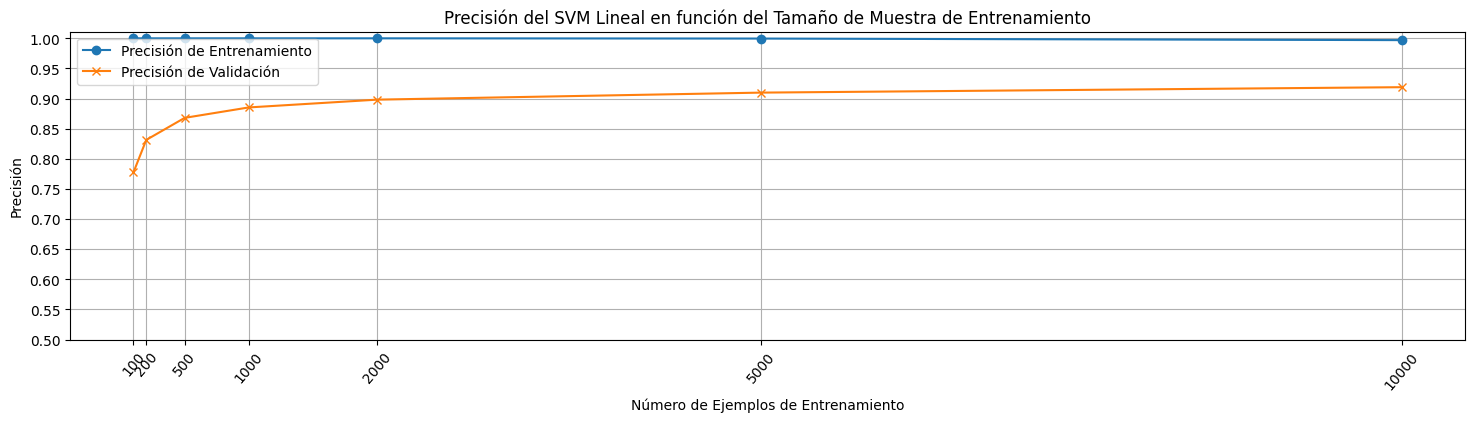

In [ ]:
plot_accuracies(training_sizes, train_accuracies, valid_accuracies)

### ___Justificación Preparación y Entrenamiento del Modelo___
---

> ___Función train_svm_classifier: Preparación y Entrenamiento del Modelo___
*    Propósito: Esta función se encarga de entrenar un clasificador SVM lineal utilizando tamaños de muestra progresivamente mayores del conjunto de datos de entrenamiento. Se convierten los DataFrames a arrays de NumPy para compatibilidad con scikit-learn y para facilitar operaciones de índice y cálculos.
*    Justificación: El entrenamiento progresivo permite evaluar cómo afecta la cantidad de datos al rendimiento del modelo, proporcionando insights sobre el aprendizaje del modelo y la generalización. La conversión a NumPy es crucial para evitar problemas de compatibilidad y mejorar el rendimiento computacional durante el entrenamiento del modelo.

> ___Cálculo de Precisión en los Conjuntos de Entrenamiento y Validación___
*    Propósito: Dentro de la misma función, se calcula y almacena la precisión del modelo tanto en el conjunto de entrenamiento como en el de validación para cada tamaño de muestra especificado.
*    Justificación: Medir la precisión en ambos conjuntos permite identificar si el modelo está sobreajustando (si la precisión en el conjunto de entrenamiento es mucho más alta que en el de validación). Este seguimiento es esencial para optimizar el modelo y asegurar que sea robusto y fiable.

> ___Función plot_accuracies: Visualización de Resultados___
*    Propósito: Esta función grafica las precisiones de entrenamiento y validación en función del tamaño de la muestra de entrenamiento. Las etiquetas del eje x son rotadas para mejorar la legibilidad, especialmente con muchos puntos de datos.
*    Justificación: La visualización efectiva de los resultados es crucial para interpretar el comportamiento del modelo a medida que cambia el tamaño del conjunto de entrenamiento. Rotar las etiquetas mejora la claridad y facilita la interpretación rápida de los datos, lo cual es especialmente útil en presentaciones o análisis detallados.

> ___Ejecución y Visualización de Resultados___
*    Propósito: Finalmente, el código ejecuta la función de entrenamiento y luego usa la función de visualización para mostrar los resultados, además de imprimir cada precisión obtenida.
*    Justificación: Ejecutar estas funciones y visualizar los resultados proporciona una comprensión completa del impacto del tamaño del conjunto de entrenamiento en la precisión del modelo. Imprimir las precisiones da una referencia inmediata sobre el rendimiento y es útil para documentación o análisis posterior.

# ___Conclusiones Detalladas del Proceso desde la Carga del Archivo hasta la Evaluación con el Conjunto de Datos de Prueba___
---

>* El uso del conjunto de datos de prueba en proyectos de clasificación del MNIST abarca varias etapas críticas del proceso de aprendizaje automático, comenzando por la carga inicial de datos y culminando en la evaluación final del modelo. Las etapas clave incluyen:

>    ___Carga de Datos y Preparación Inicial:___
*        La carga efectiva del conjunto de datos MNIST marca el comienzo del proceso de análisis de datos. Es crucial garantizar que la carga de datos se realice de manera que preserve la integridad y la estructura del conjunto de datos, lo que permite un manejo eficiente y un preprocesamiento adecuado. La revisión de la correcta carga y formato de los datos es fundamental para evitar complicaciones en las etapas de procesamiento y análisis subsiguientes.

>    ___Exploración y Preprocesamiento de Datos:___
*        Tras la carga, se realiza una exploración de los datos para identificar características clave, distribuciones y posibles anomalías. Este paso es esencial para comprender la naturaleza de los datos y para determinar las necesidades de preprocesamiento como la normalización, escalado o manipulaciones específicas que puedan ser necesarias para optimizar el rendimiento del modelo.

>    ___División de Datos en Conjuntos de Entrenamiento, Validación y Prueba:___
*        La división adecuada de los datos en conjuntos de entrenamiento, validación y prueba es crucial para un desarrollo de modelo equilibrado. El conjunto de entrenamiento permite al modelo aprender las características de los datos, mientras que el conjunto de validación ayuda a afinar los hiperparámetros y a realizar ajustes iterativos. El conjunto de prueba, siendo independiente, es vital para evaluar cómo el modelo entrenado generaliza a nuevos datos.

>    ____Entrenamiento y Ajuste del Modelo:____
*        El proceso de entrenamiento ajusta el modelo a los datos, mientras que la fase de ajuste de hiperparámetros optimiza su configuración. Estas etapas son cruciales para el desarrollo de un modelo robusto y eficiente. Durante estas fases, es esencial monitorizar el rendimiento del modelo para asegurar que no se produzca sobreajuste y para garantizar que el modelo mantiene una buena capacidad de generalización.

>    ___Evaluación Final Usando el Conjunto de Datos de Prueba:___
*        La evaluación final del modelo se realiza utilizando el conjunto de datos de prueba. Esta evaluación es decisiva, ya que proporciona una métrica objetiva del rendimiento del modelo en datos no vistos. La precisión, junto con otras métricas evaluadas en esta fase, es fundamental para determinar la viabilidad y eficacia del modelo en tareas de clasificación realistas.

---
# ___Conclusión General___
---
>* El flujo completo desde la carga de datos hasta la evaluación final utilizando el conjunto de datos de prueba subraya la importancia de cada paso en el proceso de desarrollo del modelo. Este enfoque estructurado asegura que los modelos de aprendizaje automático sean desarrollados de manera que no solo sean precisos, sino también robustos y capaces de generalizar bien más allá de los datos de entrenamiento. La correcta implementación de estos pasos es esencial para el éxito en la clasificación automatizada de dígitos y otras tareas de clasificación similares, garantizando que los sistemas desarrollados sean confiables y efectivos en aplicaciones prácticas.

# ___Recursos___
---
>* rarfile - RAR archive reader for Python — RarFile documentation. (s/f).
Readthedocs.Io.
Recuperado el 29 de abril de 2024, de https://rarfile.readthedocs.io/
Python Packaging User Guide. (s/f). Python.org. Recuperado el 29 de abril de 2024, de
https://packaging.python.org/en/latest/
* Version handling - packaging. (s/f). Pypa.Io. Recuperado el 29 de abril de 2024, de
https://packaging.pypa.io/en/latest/version.html
* sys — Parámetros y funciones específicos del sistema. (s/f). Python documentation.
Recuperado el 29 de abril de 2024, de https://docs.python.org/es/3/library/sys.html
* os — Miscellaneous operating system interfaces. (s/f). Python Documentation. Recuperado
el 29 de abril de 2024, de https://docs.python.org/3/library/os.html
Requests: HTTP for humansTM — requests 2.31.0 documentation. (s/f). Readthedocs.Io.
* Recuperado el 29 de abril de 2024, de https://requests.readthedocs.io/en/latest/
* NumPy Documentation. (s/f). Numpy.org. Recuperado el 29 de abril de 2024, de
https://numpy.org/doc/
Pandas documentation — pandas 2.2.2 documentation. (s/f). Pydata.org. Recuperado el 29
de abril de 2024, de https://pandas.pydata.org/docs/
* matplotlib.pyplot — Matplotlib 3.5.3 documentation. (s/f). Matplotlib.org. Recuperado el 29
de abril de 2024, de https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html
* Sklearn.Svm.SVC. (s/f). Scikit-Learn. Recuperado el 29 de abril de 2024, de
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
* Sklearn.Metrics.Accuracy_score. (s/f). Scikit-Learn. Recuperado el 29 de abril de 2024, de
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
* Pinzón, D. & Oviedo, D. & Thomas, M. (2024). Parcial Machine Learning. Google Colab.
https://colab.research.google.com/drive/1e-VFWyIaZe_aIhtKaSpAFdw180PqpMfK?u
sp=sharing